In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, norm
 

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline



In [2]:
sc.settings.figdir = "fig5"


# Load

In [3]:
F1_NAME="F1: Superficial"
F23_NAME="F2/3: Stroma_PPARG+"

In [4]:
# import scanpy as sc
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated9')
#adata=adata[adata.obs["Site_status_binary"]=="Lesional"
adata.obs["Site_status_binary"].value_counts()

Site_status_binary
Lesional       190756
Nonlesional    166520
Name: count, dtype: int64

# Plot counts

In [5]:
"""
original
custom_order=['Scarring',
 'Cancer',
 'Granulomatous inflammation',
 'Inflammatory + scarring risk',
 'Other inflammatory',
 'Benign\nneoplasia']

 
"""
custom_order=[  'Inflammatory+\nlow scarring risk',
 #'Granulomatous inflammation',
  'Inflammatory+\nhigh scarring risk',
              'Cancer',
 'Fibrotic/scarring',
 #'Benign\nneoplasia'
             ]

 
# RENAME = {'Other inflammatory':  'Inflammatory+\nlow scarring risk',
#  'Inflammatory + scarring risk':  'Inflammatory+\nhigh scarring risk',
#  'Scarring': 'Fibrotic/scarring',
#  'Cancer': 'Cancer',
#  'Benign neoplasia': 'Benign neoplasia',
#  'Granulomatous inflammation':  'Inflammatory+\nhigh scarring risk',}

# adata.obs['disease_category']=adata.obs['disease_category'].map(RENAME)
# # Provided dictionary



/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

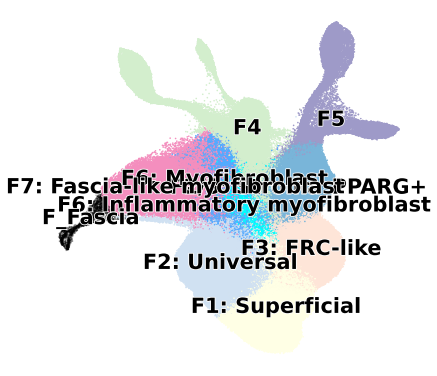

In [6]:
custom_colors = {F1_NAME: np.array([1.        , 1.        , 0.89803922, 1.        ]),
 'F1: Regenerative': np.array([0.99607843, 0.80915033, 0.39607843, 1.        ]),
 'F2: Universal': np.array([0.81411765, 0.88392157, 0.94980392, 1.        ]),
 F23_NAME: np.array([0.47294118, 0.71163399, 0.85071895, 1.        ]),
 'F3: FRC-like': np.array([0.99692426, 0.89619377, 0.84890427, 1.        ]),
 'F4': np.array([0.82745098, 0.93254902, 0.80313725, 1.        ]),
# 'F4: TNN+COCH+': np.array([0.50196078, 0.79058824, 0.50143791, 1.        ]),
 #'F4': np.array([0.15294118, 0.56183007, 0.28313725, 1.        ]),
 'F5':np.array([0.6177624 , 0.60213764, 0.78345252, 1.        ]),
 #'F5': np.array([0.47320261, 0.43267974, 0.69934641, 1.        ]),
 'F6: Inflammatory myofibroblast': np.array([0., 1., 1., 1.]),
 'F6: Myofibroblast': np.array([0.33333333, 0.66666667, 1.        , 1.        ]),
 'F7: Fascia-like myofibroblast': np.array([0.95686275, 0.55686275, 0.74509804, 1.0]),
 'F_Fascia': np.array([0, 0, 0, 0.3])
                               }

adata.obs['test13_simple']=adata.obs['test13_simple'].astype("category")
try:
    adata.uns["test13_simple_colors"] = [custom_colors[cat] for cat in adata.obs["test13_simple"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")
sc.settings.set_figure_params(dpi=30, facecolor="white", frameon=False, figsize=(8, 8
                                                                                 ))
# Generate the UMAP plot
sc.pl.umap(
    adata,
    color='test13_simple',
    show=False,
    frameon=False,
    legend_loc="on data",
    legend_fontsize=25,
    s=15,
    title='',
    legend_fontoutline=2
)


In [7]:
adata.obs['Patient_status3'] = np.where(
    adata.obs['Patient_status'] == "Healthy",
    "Healthy",
    np.where(
        adata.obs['Site_status_binary'] == "Lesional",
        adata.obs['Patient_status2'],
        "Nonlesional"
    )
)
adata.obs['Patient_status3'] .value_counts()

Patient_status3
Healthy                     130934
Dupuytren's                  41220
Nonlesional                  35586
Psoriasis                    32608
Keloid scar                  28048
Systemic sclerosis           27444
Prurigo nodularis            11573
Non-keloid scar               7302
Neurofibroma                  6617
Erythema migrans              5998
Eczema                        5892
Alopecia areata               5429
Basal cell carcinoma          5231
Sarcoidosis                   2196
Acne                          2051
Morphoea (pansclerotic)       1657
Acral melanoma                1451
Lupus (SCLE)                  1447
Hidradenitis supparativa      1285
Drug reaction: lichenoid      1043
Squamous cell carcinoma        691
Drug reaction: DRESS           675
Granuloma annulare             381
Lupus (DLE)                    330
Cutaneous melanoma             187
Name: count, dtype: int64

In [8]:
categories = {"Nonlesional":  ["Healthy", "Nonlesional"],
      'Inflammatory': ['Psoriasis', 'Prurigo nodularis', 'Alopecia areata', 'Erythema migrans', 'Eczema',  'Drug reaction: lichenoid',
 'Drug reaction: DRESS','Lupus (SCLE)',],# ,
          'Inflammatory + scarring risk': ['Acne', 'Hidradenitis supparativa',
                                             'Lupus (DLE)',
                                             ],# ],
        'Granulomatous inflammation': ['Sarcoidosis', 'Granuloma annulare'],

      'Cancer': [ 'Acral melanoma',
 'Cutaneous melanoma',
 'Basal cell carcinoma', 
 'Squamous cell carcinoma',], # 'CTCL'

  'Scarring': [ 'Non-keloid scar',
 'Keloid scar',     "Dupuytren's",  'Systemic sclerosis',   'Morphoea (pansclerotic)',  #'Eosinophilic fasciitis',
                                            ],
    'Benign neoplasia': ['Neurofibroma']
}
list(categories.keys())



['Nonlesional',
 'Inflammatory',
 'Inflammatory + scarring risk',
 'Granulomatous inflammation',
 'Cancer',
 'Scarring',
 'Benign neoplasia']

In [9]:
adata.obs['Patient_status3'] = np.where(
    adata.obs['Patient_status'] == "Nonlesional",
    "Healthy",
    np.where(
        adata.obs['Site_status_binary'] == "Lesional",
        adata.obs['Patient_status2'],
        "Nonlesional"
    )
)
adata.obs['Patient_status3'] .value_counts()

Patient_status3
Nonlesional                 166520
Dupuytren's                  41220
Psoriasis                    32608
Keloid scar                  28048
Systemic sclerosis           27444
Prurigo nodularis            11573
Non-keloid scar               7302
Neurofibroma                  6617
Erythema migrans              5998
Eczema                        5892
Alopecia areata               5429
Basal cell carcinoma          5231
Sarcoidosis                   2196
Acne                          2051
Morphoea (pansclerotic)       1657
Acral melanoma                1451
Lupus (SCLE)                  1447
Hidradenitis supparativa      1285
Drug reaction: lichenoid      1043
Squamous cell carcinoma        691
Drug reaction: DRESS           675
Granuloma annulare             381
Lupus (DLE)                    330
Cutaneous melanoma             187
Name: count, dtype: int64

In [10]:
RENAME = {"Eczema": "Atopic dermatitis"}
adata.obs["Patient_status3"] = adata.obs["Patient_status3"].map(RENAME).fillna(adata.obs["Patient_status3"] )

In [11]:
categories = {"Nonlesional":  [ "Nonlesional"],
     'Inflammatory + low scarring risk': [ 'Atopic dermatitis', 'Psoriasis', 'Prurigo nodularis', 'Alopecia areata', 'Erythema migrans',  'Drug reaction: lichenoid',
 'Drug reaction: DRESS','Lupus (SCLE)',],# ,

       
    'Inflammatory + high scarring risk': ['Acne', 'Hidradenitis supparativa',
                                             'Lupus (DLE)',
                                     'Sarcoidosis', 'Granuloma annulare'],
                'Cancer': [ 'Acral melanoma',
 'Cutaneous melanoma',
 'Basal cell carcinoma', 
 'Squamous cell carcinoma',], # 'CTCL'      

   # 'Benign neoplasia': ['Neurofibroma']
                 'Fibrotic/scarring': [ 'Non-keloid scar',
 'Keloid scar',     "Dupuytren's",  'Systemic sclerosis',   'Morphoea (pansclerotic)',  #'Eosinophilic fasciitis',
                                            ],
              
    'Benign neoplasia': ['Neurofibroma']
}
list(categories.keys())


['Nonlesional',
 'Inflammatory + low scarring risk',
 'Inflammatory + high scarring risk',
 'Cancer',
 'Fibrotic/scarring',
 'Benign neoplasia']

In [12]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Process data as before
# category_counts = adata.obs['Patient_status3'].value_counts()
# grouped = adata.obs.groupby(['Patient_status3', 'test13_simple'], observed=True).size().unstack(fill_value=0)
# proportions = grouped.div(grouped.sum(axis=1), axis=0)

# # Sort proportions into categories and add spacer rows
# sorted_proportions = pd.DataFrame()
# category_positions = {}  # Dictionary to store start and end positions of each category
# for category, labels in categories.items():
#     subset = proportions.loc[labels]
#     subset = subset.sort_values(by='F6: Myofibroblast', ascending=False)
    
#     # Track the start and end index positions for the category
#     start_pos = len(sorted_proportions)
#     sorted_proportions = pd.concat([sorted_proportions, subset])
#     end_pos = len(sorted_proportions) - 1
    
#     # Store the start and end positions in the dictionary
#     category_positions[category] = (start_pos, end_pos)
    
#     # Add spacer row
#     spacer_row = pd.DataFrame(np.nan, index=[f"{category}_spacer"], columns=subset.columns)
#     sorted_proportions = pd.concat([sorted_proportions, spacer_row])

# # Define the color list based on the custom_colors dictionary
# color_list = [custom_colors.get(col, '#d3d3d3') for col in sorted_proportions.columns]

# # Set up the plot with more balanced proportions
# fig, ax = plt.subplots(figsize=(14, 4), dpi=300)  # Reduced width, higher dpi for journal quality

# bar_width = 0.75  # Increased bar width slightly for a more substantial appearance
# indices = np.arange(len(sorted_proportions))

# # Stack bars in reverse order with a light grey edge around each bar if non-zero data
# bottom = np.zeros(len(sorted_proportions))
# for i, col in enumerate(reversed(sorted_proportions.columns)):
#     color = color_list[-(i + 1)]  # Select colors in reverse order to match the reversed columns
#     heights = np.nan_to_num(sorted_proportions[col])
    
#     # Add bars only where heights are non-zero
#     ax.bar(
#         indices,
#         heights,
#         bar_width,
#         bottom=bottom,
#         color=color,
#         label=col,
#         edgecolor="lightgrey" if np.any(heights > 0) else None,  # Light grey border only for non-empty bars
#         linewidth=0.5  # Thin line
#     )
#     bottom += heights

# # Create x-tick labels, setting empty labels for spacer rows
# xtick_labels = [
#     f"{label}\n(n={category_counts.get(label, 0)})" if label in category_counts else ""
#     for label in sorted_proportions.index
# ]

# # Set x-ticks only for positions with actual labels (not empty spacer rows)
# valid_ticks = [i for i, label in enumerate(xtick_labels) if label != ""]

# # Apply x-ticks and labels for only the valid tick positions
# ax.set_xticks(valid_ticks)
# ax.set_xticklabels([xtick_labels[i] for i in valid_ticks], rotation=90, fontsize=10)

# # Enhance axis labels, ticks, and limits
# ax.set_xlabel('')
# ax.set_ylabel('Proportion', fontsize=14, labelpad=10)
# plt.yticks(fontsize=10)
# plt.ylim(0, 1.15)

# # Clean up plot borders and add space for categories
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.grid(False)

# # Add horizontal bars and category names above each section
# for category, (start, end) in category_positions.items():
#     mid_pos = (start + end) / 2
#     ax.hlines(y=1.05, xmin=start - 0.4, xmax=end + 0.4, color='grey', linewidth=1)
#     ax.text(mid_pos, 1.08, category, ha='center', va='bottom', fontsize=12, fontweight='bold')

# # Refine the legend with appropriate size and position
# handles, labels = ax.get_legend_handles_labels()
# legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
#                    frameon=False, fontsize=10, title="Cell Types", title_fontsize=12)
# plt.setp(legend.get_texts(), fontsize='10')

# # Apply tight layout to optimize spacing
# plt.tight_layout()

# plt.show()
# plt.savefig('figures/fig4.png')

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Process data as before
# category_counts = adata.obs['Patient_status3'].value_counts()
# grouped = adata.obs.groupby(['Patient_status3', 'test13_simple'], observed=True).size().unstack(fill_value=0)
# proportions = grouped.div(grouped.sum(axis=1), axis=0)

# # Sort proportions into categories and add spacer rows
# sorted_proportions = pd.DataFrame()
# category_positions = {}  # Dictionary to store start and end positions of each category
# for category, labels in categories.items():
#     subset = proportions.loc[labels]
#     subset = subset.sort_values(by='F6: Myofibroblast', ascending=False)
    
#     # Track the start and end index positions for the category
#     start_pos = len(sorted_proportions)
#     sorted_proportions = pd.concat([sorted_proportions, subset])
#     end_pos = len(sorted_proportions) - 1
    
#     # Store the start and end positions in the dictionary
#     category_positions[category] = (start_pos, end_pos)
    
#     # Add spacer row
#     spacer_row = pd.DataFrame(np.nan, index=[f"{category}_spacer"], columns=subset.columns)
#     sorted_proportions = pd.concat([sorted_proportions, spacer_row])

# # Define the color list based on the custom_colors dictionary
# color_list = [custom_colors.get(col, '#d3d3d3') for col in sorted_proportions.columns]

# # Set up the plot with more balanced proportions
# fig, ax = plt.subplots(figsize=(14, 4), dpi=300)  # Reduced width, higher dpi for journal quality

# bar_width = 0.75  # Increased bar width slightly for a more substantial appearance
# indices = np.arange(len(sorted_proportions))

# # Stack bars in reverse order with a light grey edge around each bar if non-zero data
# bottom = np.zeros(len(sorted_proportions))
# for i, col in enumerate(reversed(sorted_proportions.columns)):
#     color = color_list[-(i + 1)]  # Select colors in reverse order to match the reversed columns
#     heights = np.nan_to_num(sorted_proportions[col])
    
#     # Add bars only where heights are non-zero
#     ax.bar(
#         indices,
#         heights,
#         bar_width,
#         bottom=bottom,
#         color=color,
#         label=col,
#         edgecolor="lightgrey" if np.any(heights > 0) else None,  # Light grey border only for non-empty bars
#         linewidth=0.5  # Thin line
#     )
#     bottom += heights

# # Create x-tick labels, setting empty labels for spacer rows
# xtick_labels = [
#     f"{label}\n(n={category_counts.get(label, 0)})" if label in category_counts else ""
#     for label in sorted_proportions.index
# ]

# # Set x-ticks only for positions with actual labels (not empty spacer rows)
# valid_ticks = [i for i, label in enumerate(xtick_labels) if label != ""]

# # Apply x-ticks and labels for only the valid tick positions
# ax.set_xticks(valid_ticks)
# ax.set_xticklabels([xtick_labels[i] for i in valid_ticks], rotation=90, fontsize=8)

# # Enhance axis labels, ticks, and limits
# ax.set_xlabel('')
# ax.set_ylabel('Proportion', fontsize=14, labelpad=10)
# plt.yticks(fontsize=10)
# plt.ylim(0, 1.15)

# # Clean up plot borders and add space for categories
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.grid(False)

# # Add horizontal bars and category names above each section
# for category, (start, end) in category_positions.items():
#     mid_pos = (start + end) / 2
#     ax.hlines(y=1.05, xmin=start - 0.4, xmax=end + 0.4, color='grey', linewidth=1)
#     ax.text(mid_pos, 1.08, category, ha='center', va='bottom', fontsize=12, fontweight='bold')

# # Refine the legend with appropriate size and position
# handles, labels = ax.get_legend_handles_labels()
# legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
#                    frameon=False, fontsize=10, title="Cell Types", title_fontsize=12)
# plt.setp(legend.get_texts(), fontsize='10')

# # Apply tight layout to optimize spacing
# plt.tight_layout()

# plt.show()
# plt.savefig('figures/fig4_smallertext.png')

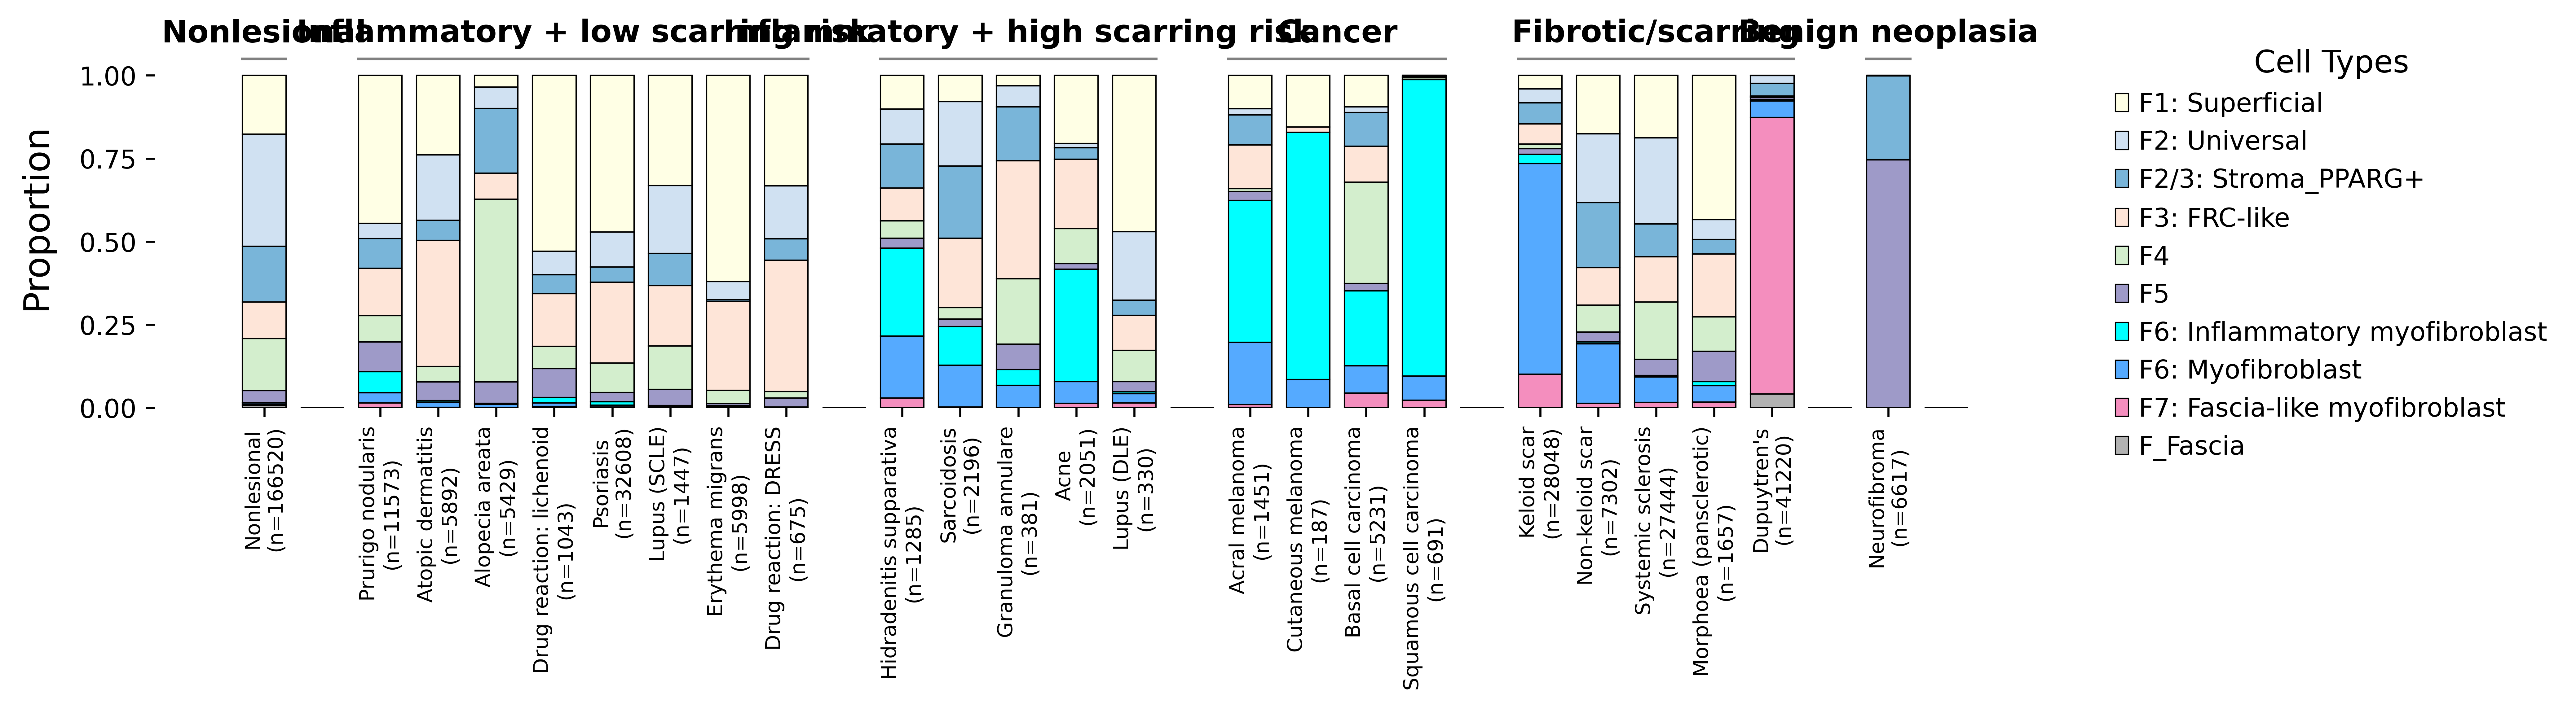

<Figure size 240x240 with 0 Axes>

In [14]:
category_counts = adata.obs['Patient_status3'].value_counts()
grouped = adata.obs.groupby(['Patient_status3', 'test13_simple'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

sorted_proportions = pd.DataFrame()
category_positions = {}  
for category, labels in categories.items():
    subset = proportions.loc[labels]
    subset = subset.sort_values(by='F6: Myofibroblast', ascending=False)
    
    start_pos = len(sorted_proportions)
    sorted_proportions = pd.concat([sorted_proportions, subset])
    end_pos = len(sorted_proportions) - 1
    
    category_positions[category] = (start_pos, end_pos)
    
    spacer_row = pd.DataFrame(np.nan, index=[f"{category}_spacer"], columns=subset.columns)
    sorted_proportions = pd.concat([sorted_proportions, spacer_row])


color_list = [custom_colors.get(col, '#d3d3d3') for col in sorted_proportions.columns]


fig, ax = plt.subplots(figsize=(14, 4), dpi=300) 

bar_width = 0.75  
indices = np.arange(len(sorted_proportions))


bottom = np.zeros(len(sorted_proportions))
for i, col in enumerate(reversed(sorted_proportions.columns)):
    color = color_list[-(i + 1)]  
    heights = np.nan_to_num(sorted_proportions[col])
    

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color,
        label=col,
        edgecolor="black" if np.any(heights > 0) else None,  
        linewidth=0.5 
    )
    bottom += heights


xtick_labels = [
    f"{label}\n(n={category_counts.get(label, 0)})" if label in category_counts else ""
    for label in sorted_proportions.index
]


valid_ticks = [i for i, label in enumerate(xtick_labels) if label != ""]


ax.set_xticks(valid_ticks)
ax.set_xticklabels([xtick_labels[i] for i in valid_ticks], rotation=90, fontsize=8)


ax.set_xlabel('')
ax.set_ylabel('Proportion', fontsize=14, labelpad=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1.15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)


for category, (start, end) in category_positions.items():
    mid_pos = (start + end) / 2
    ax.hlines(y=1.05, xmin=start - 0.4, xmax=end + 0.4, color='grey', linewidth=1)
    ax.text(mid_pos, 1.08, category, ha='center', va='bottom', fontsize=12, fontweight='bold')


handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
                   frameon=False, fontsize=10, title="Cell Types", title_fontsize=12)
plt.setp(legend.get_texts(), fontsize='10')

plt.tight_layout()

plt.show()
plt.savefig('fig4/4a.pdf')

In [15]:
stop

NameError: name 'stop' is not defined